In [ ]:
#importing the libraries needed
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from time import sleep
from random import randint

#Declaring the headers
headers = {"Accept-Language": "en-US,en;q=0.5"}

#declaring the list of empty variables, So that we can append the data overall

movie_name = []
year = []
time=[]
rating=[]
metascore =[]
votes = []
gross = []
description = []

#creating an array of values and passing it in the url for dynamic webpages
pages = np.arange(1,1000,100)
#the whole core of the script
for page in pages:
    page = requests.get("https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start="+str(page)+"&ref_=adv_nxt")
    soup = BeautifulSoup(page.text, 'html.parser')
    movie_data = soup.findAll('div', attrs = {'class': 'lister-item mode-advanced'})
    sleep(randint(2,8))
    for store in movie_data:
        name = store.h3.a.text
        movie_name.append(name)

        year_of_release = store.h3.find('span', class_ = "lister-item-year text-muted unbold").text
        year.append(year_of_release)

        runtime = store.p.find("span", class_ = 'runtime').text
        time.append(runtime)

        rate = store.find('div', class_ = "inline-block ratings-imdb-rating").text.replace('\n', '')
        rating.append(rate)

        meta = store.find('span', class_ = "metascore").text if store.find('span', class_ = "metascore") else "****"
        metascore.append(meta)


        value = store.find_all('span', attrs = {'name': "nv"})

        vote = value[0].text
        votes.append(vote)
        grosses = value[1].text if len(value)>1 else '%^%^%^'
        gross.append(grosses)

        # Description of the Movies -- Not explained in the Video, But you will figure it out.
        describe = store.find_all('p', class_ = 'text-muted')
        description_ = describe[1].text.replace('\n', '') if len(describe) >1 else '*****'
        description.append(description_)
movie_list = pd.DataFrame({ "Movie Name": movie_name, "Year of Release" : year, "Watch Time": time,"Movie Rating": rating, "Meatscore of movie": metascore, "Votes" : votes, "Gross":gross,"Description":description})

In [ ]:
#Top 5 movies
movie_list.head(5)

,Movie Name,Year of Release,Watch Time,Movie Rating,Meatscore of movie,Votes,Gross,Description
0,The Shawshank Redemption,(1994),142 min,9.3,82,"2,781,557",$28.34M,"Over the course of several years, two convicts..."
1,The Godfather,(1972),175 min,9.2,100,"1,936,660",$134.97M,"Don Vito Corleone, head of a mafia family, dec..."
2,The Dark Knight,(2008),152 min,9.0,84,"2,759,547",$534.86M,When the menace known as the Joker wreaks havo...
3,Schindler's List,(1993),195 min,9.0,95,"1,399,731",$96.90M,"In German-occupied Poland during World War II,..."
4,12 Angry Men,(1957),96 min,9.0,97,"825,719",$4.36M,The jury in a New York City murder trial is fr...


In [ ]:
#making a csv file
df=movie_list.to_csv("Top 1000 IMDb movies.csv",index=False)

In [ ]:
df=pd.read_csv("Top 1000 IMDb movies.csv")
df

,Movie Name,Year of Release,Watch Time,Movie Rating,Meatscore of movie,Votes,Gross,Description
0,The Shawshank Redemption,(1994),142 min,9.3,82,"2,781,557",$28.34M,"Over the course of several years, two convicts..."
1,The Godfather,(1972),175 min,9.2,100,"1,936,660",$134.97M,"Don Vito Corleone, head of a mafia family, dec..."
2,The Dark Knight,(2008),152 min,9.0,84,"2,759,547",$534.86M,When the menace known as the Joker wreaks havo...
3,Schindler's List,(1993),195 min,9.0,95,"1,399,731",$96.90M,"In German-occupied Poland during World War II,..."
4,12 Angry Men,(1957),96 min,9.0,97,"825,719",$4.36M,The jury in a New York City murder trial is fr...
...,...,...,...,...,...,...,...,...
995,A Very Long Engagement,(2004),133 min,7.6,76,"75,037",$6.17M,Tells the story of a young woman's relentless ...
996,Philomena,(2013),98 min,7.6,77,"102,377",$37.71M,A world-weary political journalist picks up th...
997,Shine,(1996),105 min,7.6,87,"55,619",$35.81M,"Pianist David Helfgott, driven by his father a..."
998,The Invisible Man,(1933),71 min,7.6,87,"37,857",%^%^%^,"A scientist finds a way of becoming invisible,..."


In [ ]:
df.fillna(0)

,Movie Name,Year of Release,Watch Time,Movie Rating,Meatscore of movie,Votes,Gross,Description
0,The Shawshank Redemption,(1994),142 min,9.3,82,"2,781,557",$28.34M,"Over the course of several years, two convicts..."
1,The Godfather,(1972),175 min,9.2,100,"1,936,660",$134.97M,"Don Vito Corleone, head of a mafia family, dec..."
2,The Dark Knight,(2008),152 min,9.0,84,"2,759,547",$534.86M,When the menace known as the Joker wreaks havo...
3,Schindler's List,(1993),195 min,9.0,95,"1,399,731",$96.90M,"In German-occupied Poland during World War II,..."
4,12 Angry Men,(1957),96 min,9.0,97,"825,719",$4.36M,The jury in a New York City murder trial is fr...
...,...,...,...,...,...,...,...,...
995,A Very Long Engagement,(2004),133 min,7.6,76,"75,037",$6.17M,Tells the story of a young woman's relentless ...
996,Philomena,(2013),98 min,7.6,77,"102,377",$37.71M,A world-weary political journalist picks up th...
997,Shine,(1996),105 min,7.6,87,"55,619",$35.81M,"Pianist David Helfgott, driven by his father a..."
998,The Invisible Man,(1933),71 min,7.6,87,"37,857",%^%^%^,"A scientist finds a way of becoming invisible,..."


In [ ]:
# df.fillna(axis='columns')
replacevalues={'Movie Name':0,'Year of Release':0,'Watch Time':0,'Movie Rating':0,'Metascore of movie':8}
df.fillna(replacevalues,limit=2)

,Movie Name,Year of Release,Watch Time,Movie Rating,Meatscore of movie,Votes,Gross,Description
0,The Shawshank Redemption,(1994),142 min,9.3,82,"2,781,557",$28.34M,"Over the course of several years, two convicts..."
1,The Godfather,(1972),175 min,9.2,100,"1,936,660",$134.97M,"Don Vito Corleone, head of a mafia family, dec..."
2,The Dark Knight,(2008),152 min,9.0,84,"2,759,547",$534.86M,When the menace known as the Joker wreaks havo...
3,Schindler's List,(1993),195 min,9.0,95,"1,399,731",$96.90M,"In German-occupied Poland during World War II,..."
4,12 Angry Men,(1957),96 min,9.0,97,"825,719",$4.36M,The jury in a New York City murder trial is fr...
...,...,...,...,...,...,...,...,...
995,A Very Long Engagement,(2004),133 min,7.6,76,"75,037",$6.17M,Tells the story of a young woman's relentless ...
996,Philomena,(2013),98 min,7.6,77,"102,377",$37.71M,A world-weary political journalist picks up th...
997,Shine,(1996),105 min,7.6,87,"55,619",$35.81M,"Pianist David Helfgott, driven by his father a..."
998,The Invisible Man,(1933),71 min,7.6,87,"37,857",%^%^%^,"A scientist finds a way of becoming invisible,..."


In [ ]:
temp=df.drop_duplicates(subset="Movie Rating",
                     keep=False, inplace=True)
print(temp)


None


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

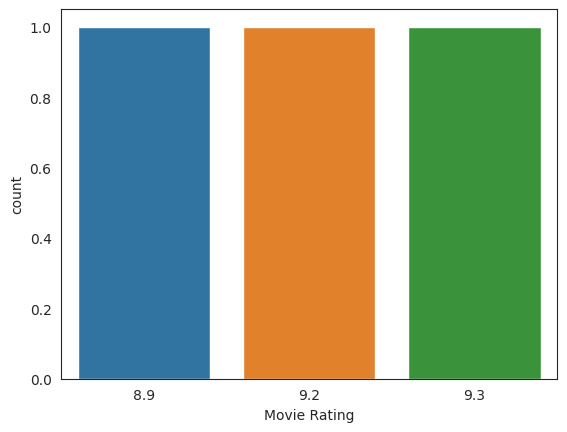

In [ ]:
sns.countplot(data=df, x='Movie Rating');

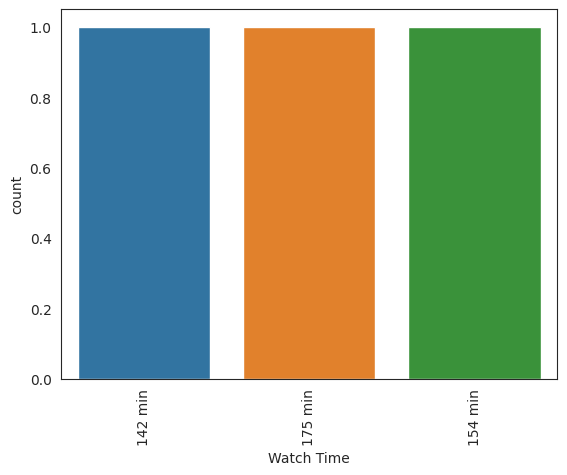

In [ ]:
# vf=df['Votes'].value_counts().index
# sns.countplot(data=df,y='Movie Name',order=vf)
# plt.xticks(rotation=90);
sns.countplot(data=df, x='Watch Time');
plt.xticks(rotation=90);

(-1.1, 1.1, -1.1, 1.1)

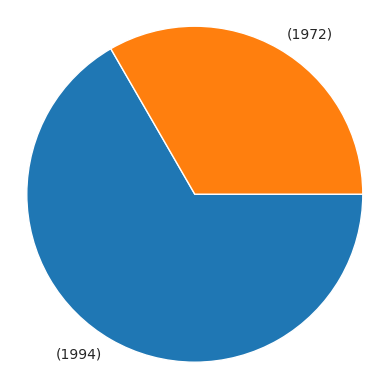

In [ ]:
sorted_count=df['Year of Release'].value_counts()
plt.pie(sorted_count,labels=sorted_count.index,startangle=0,counterclock=False);
plt.axis('square')